In [1]:
%pylab inline
from lat_util import *
from DF_lib import *
from float_test import isfloat
from mpl_toolkits.mplot3d import axes3d

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def sp(file,t):
    arr = readf(file)
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    
    figure(figsize=(10, 8))
     
    plot(s,sx,'b-',label = r'$S_x$')
    plot(s,sy,'g-',label = r'$S_y$')
    plot(s,sz,'r-',label = r'$S_z$')

    xlabel('s(m)',size = 20)
    ylabel('Spin Component',size = 20)
    title(r'Spin Motion of $e ^{-}$ (Co-Moving Frame) in the Rot Ring',size =20)
    legend(loc='best', fontsize = 15)
    show() 

In [4]:
def tp(file, t, lsc, r, m, n):
    arr = readf(file)
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,':')
    
    x, y, z, theta, phi, psi, sx, sy, sz = dc(x, y, z, theta, phi, psi, sx, sy, sz, lsc)
    
    
    idxi, namei, keyi, si, li, xi, yi, zi, thetai, phii, psii, sxi, syi, szi = search_engine(arr,'INJECTIO')
    
    xi, yi, zi, thetai, phii, psii, sxi, syi, szi = dc(xi, yi, zi, thetai, phii, psii, sxi, syi, szi, lsc)
        
    xx = x
    yy = y
    zz = z
    
    x0 = x[0]
    y0 = y[0]
    z0 = z[0]
    
    Rx = x[1855]
    Ry = y[1855]
    Rz = z[1855]
    
    Lx = x[5321]
    Ly = y[5321]
    Lz = z[5321]

    Sz0, Sx0, Sy0 = ct(theta[0], sz[0], sx[0], sy[0])
    
    
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    
    x, y, z, theta, phi, psi, sx, sy, sz = dc(x, y, z, theta, phi, psi, sx, sy, sz, lsc)
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = selector(idx, x, y, z, theta, phi, psi, sx, sy, sz, r, m, n)

    Sz, Sx, Sy = ct(Theta, Sz, Sx, Sy)
    
    fig = figure(figsize=(13,11))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlim([min(zz), max(zz)])
    ax.set_ylim([min(xx),max(xx)])
    ax.set_zlim([-1, 2])
        
    ax.quiver(z0, x0, y0, Sz0, Sx0, Sy0, color ='red',alpha = 1)

    ax.plot(zz, xx, yy, color='gold', linewidth = 2) 

    
    ax.scatter(z0, x0, y0, c= 'darkorange', marker='o',s=50)
    ax.text(0, 0, -0.5, "IP", color='red', size = 20)
    
    ax.scatter(zi, xi, yi, c= 'darkorange', marker='o',s=50)
    ax.text(zi[0], xi[0], zi[0]-1, "Injection", color='darkorange', size = 20)
    
    ax.quiver(Z, X, Y, Sz, Sx, Sy, color ='olive',alpha = 0.6)
    ax.quiver(z0, x0, y0, Sz0, Sx0, Sy0, color ='red',alpha = 1)
    
    ax.text(Rz, Rx, Ry-0.5, "R-Rot", color='darkorange', size = 20)
    ax.text(Lz, Lx, Ly-0.5, "L-Rot", color='darkorange', size = 20)
        
    ax.set_title(r'Spin Motion of $e ^-$ (Lab Frame) in the SuperKEKB HER with Spin Rotator Installed', size =17) 
    ax.set_xlabel(r'Z ($\times %s m$)'%lsc,fontsize=15)
    ax.set_ylabel(r'X ($\times %s m$)'%lsc,fontsize=15)
    ax.set_zlabel(r'Y',fontsize=15)
    
    show()

In [10]:
DF('Rot-spin-floor(-).txt', ':')

,index,name,key,s (m),l (m),floor.x,floor.y,floor.z,floor.theta,floor.phi,floor.psi,spin.x,spin.y,spin.z
0,0,BEGINNING,Beginning_Ele,0.0,---,0.0,0.0,-0.0,-6.2832,0.0,0.0,0.000005,0.000097,1.0
1,1,END,Marker,0.0,0.000,0.0,0.0,-0.0,-6.2832,0.0,0.0,0.000005,0.000097,1.0
2,2,IP,Marker,0.0,0.000,0.0,0.0,-0.0,-6.2832,0.0,0.0,0.000005,0.000097,1.0
3,3,ESRE0,Marker,0.0,0.000,0.0,0.0,-0.0,-6.2832,0.0,0.0,0.000005,0.000097,1.0
4,4,ECSRE5,Sad_Mult,0.01,0.010,0.0,0.0,-0.01,-6.2832,0.0,0.0,0.000006,0.000987,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,7410,ESLE0,Marker,3016.315,0.000,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.000005,0.000097,1.0
7411,7411,FVBBKE,Sbend,3016.315,0.000,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.000005,0.000097,1.0
7412,7412,FHBBKE,Sbend,3016.315,0.000,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.000005,0.000097,1.0
7413,7413,FBMBME,Marker,3016.315,0.000,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.000005,0.000097,1.0


<IPython.core.display.Javascript object>


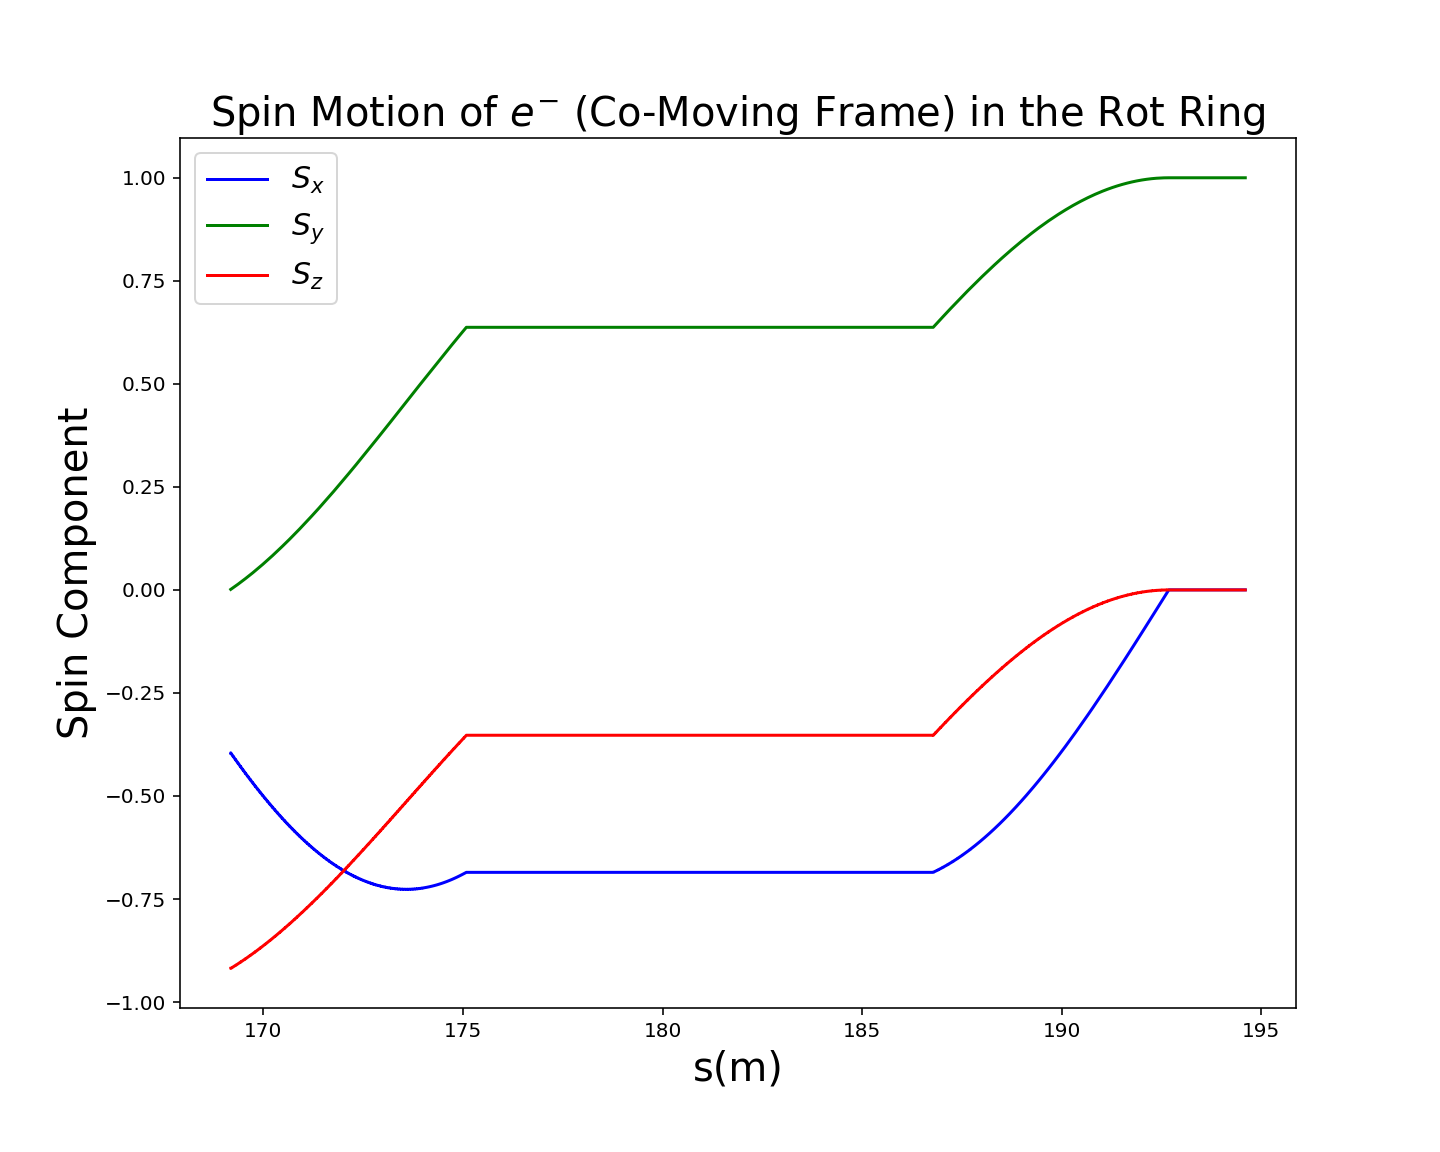

In [8]:
sp('Rot-spin-floor(-).txt', 's 168 195')

<IPython.core.display.Javascript object>


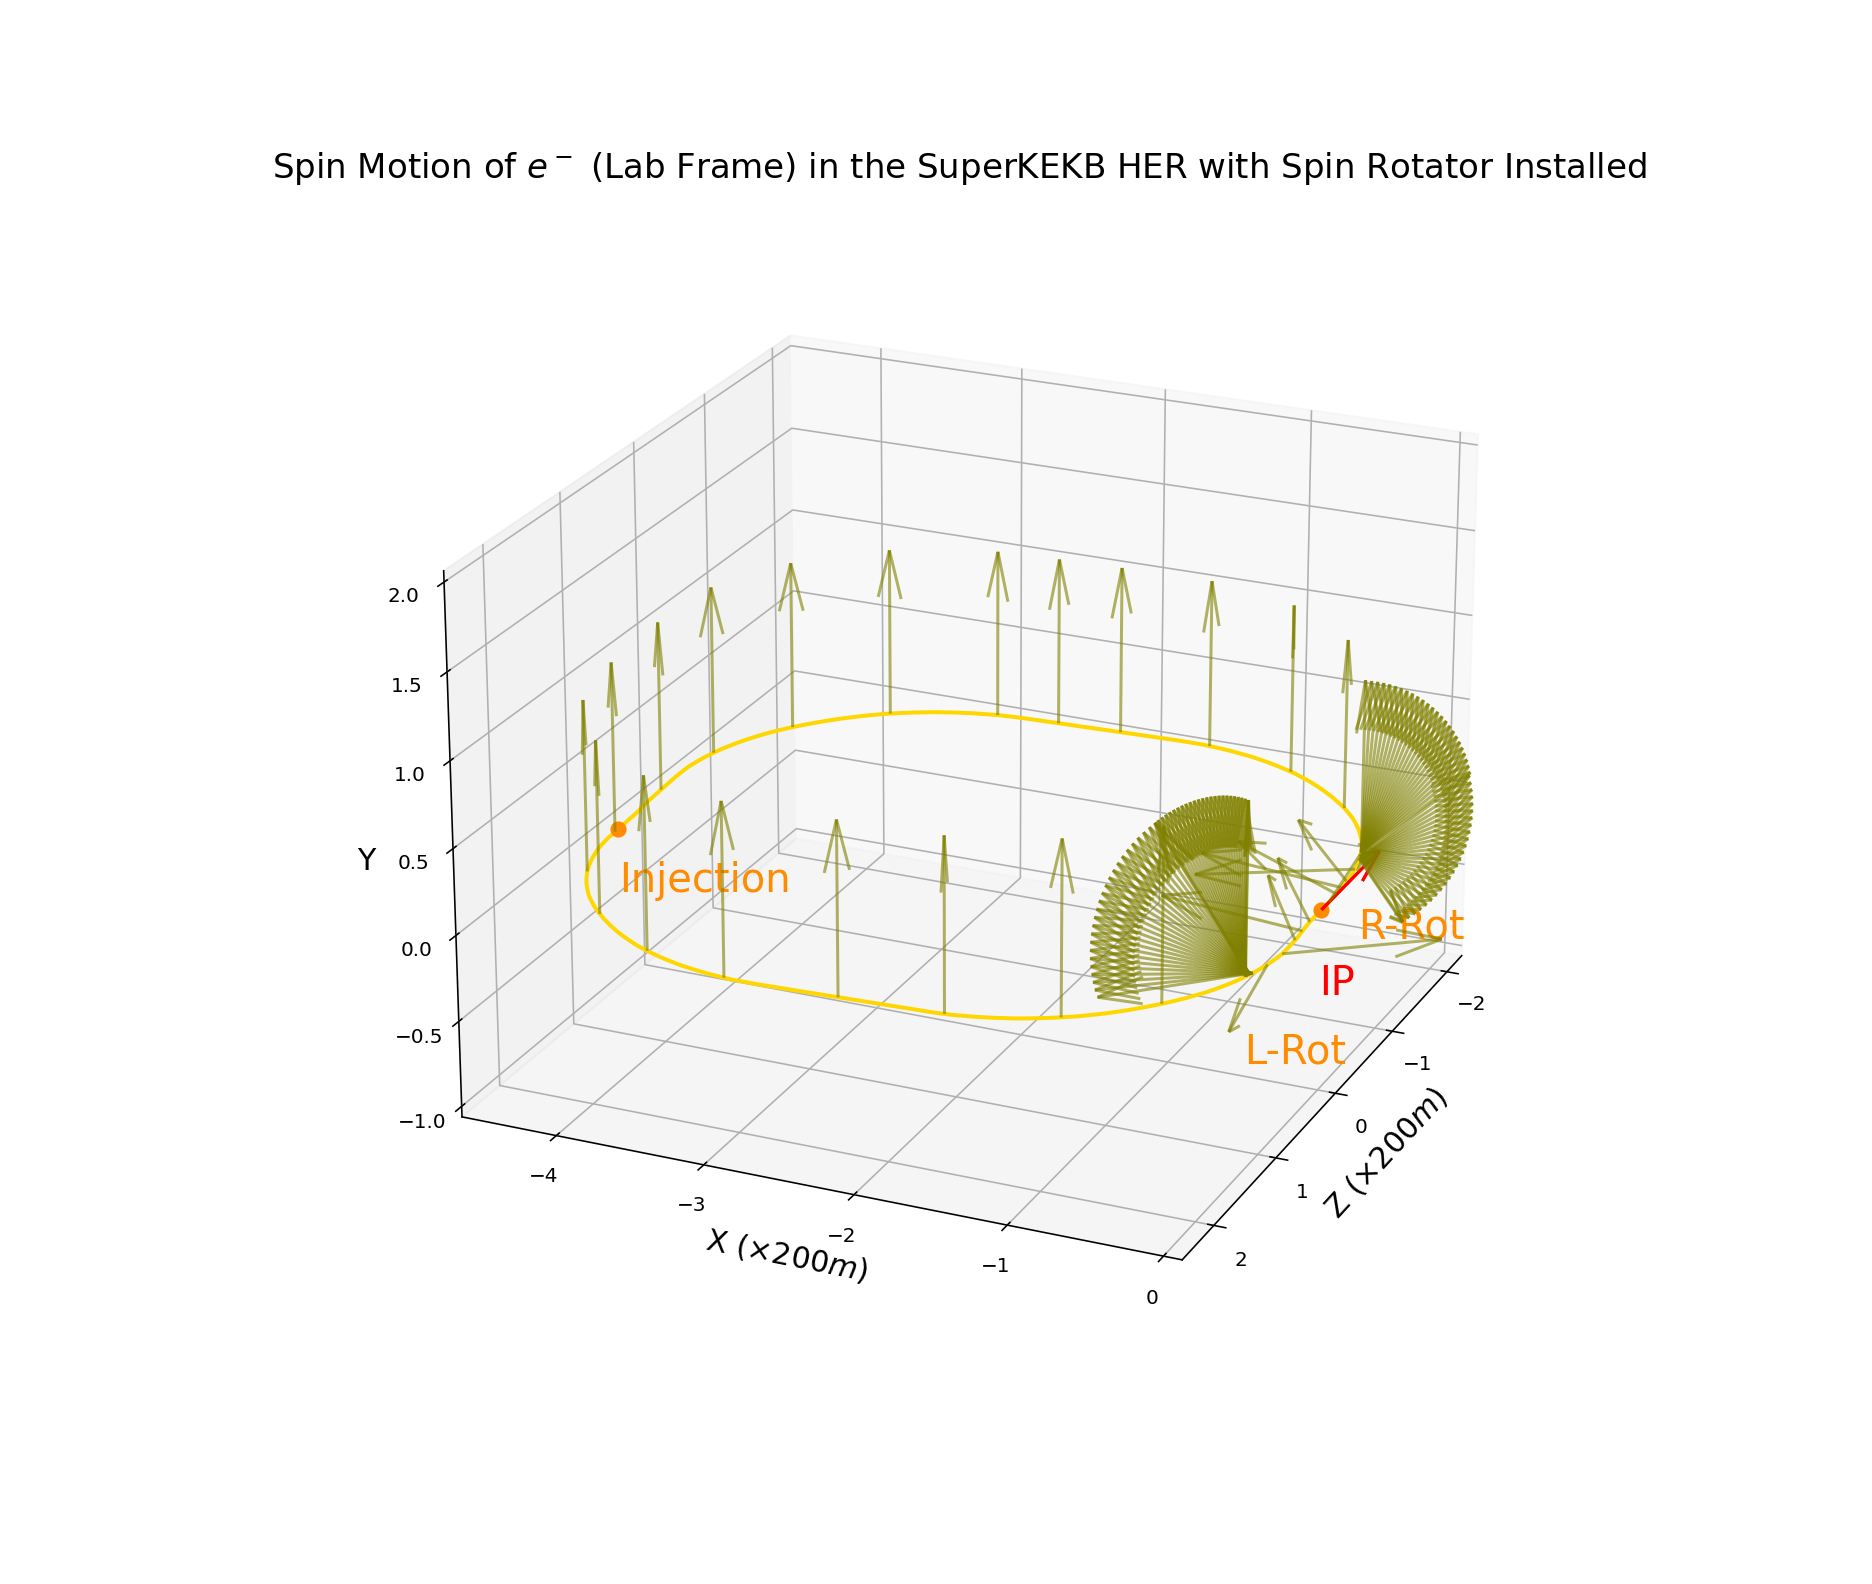

In [17]:
tp('Rot-spin-floor(-).txt', ':', 200, 20, 24, 5) 